# Hands-On

Você foi designado para realizar a limpeza e preparação de dados de dois conjuntos de dados (base1.csv e base2.csv) distintos que representam informações relacionadas a risco de crédito.

Seu objetivo é ler os dois conjuntos de dados usando a biblioteca Pandas, realizar a concatenação dos dados, lidar com valores duplicados e faltantes, além de verificar a presença de outliers nos dados combinados.

____

## Passos a serem seguidos:

1. **Leitura dos Arquivos:** Utilize a biblioteca Pandas para ler os dois arquivos de dados: 'base1.csv' e 'base2.csv', que estão no diretório datasets, no repositório do módulo.
2. **Concatenação dos Dados:** Concatene os dois conjuntos de dados em um único DataFrame, verificando se os dados possuem a mesma estrutura para uma concatenação adequada.
3. **Tratamento de Dados Duplicados:** Verifique se há linhas duplicadas no DataFrame combinado e remova-as, mantendo a primeira ocorrência.
4. **Tratamento de Valores Faltantes:** Identifique e lide com os valores faltantes no DataFrame combinado. Preencha os valores ausentes com estratégias apropriadas (média, mediana, valor específico etc.) dependendo do contexto dos dados.
5. **Verificação de Outliers:** Utilize métodos estatísticos ou gráficos (como boxplots) para identificar a presença de outliers nos dados. Considere se eles são significativos para a análise ou se precisam ser tratados de alguma forma.

In [36]:
import pandas as pd

In [35]:
# leitura de arquivos
df_base1 = pd.read_csv('../datasets/base1.csv')
df_base2 = pd.read_csv('../datasets/base2.csv')

In [37]:
# Verificando o formato do conjunto de dados
df_base1.info()
df_base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      670 non-null    int64 
 1   Unnamed: 0        670 non-null    int64 
 2   Age               670 non-null    int64 
 3   Sex               670 non-null    object
 4   Job               670 non-null    int64 
 5   Housing           670 non-null    object
 6   Saving accounts   547 non-null    object
 7   Checking account  409 non-null    object
 8   Credit amount     670 non-null    int64 
 9   Duration          670 non-null    int64 
 10  Purpose           670 non-null    object
 11  Risk              670 non-null    object
dtypes: int64(6), object(6)
memory usage: 62.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0 

In [4]:
#concatenando os dados
df_concat = pd.concat([df_base1,df_base2], ignore_index=True)
df_concat

,Unnamed: 0.1,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,104,104,26,male,2,rent,NaN,NaN,2445,12,car,good
1,360,360,61,male,2,free,NaN,moderate,1239,18,education,good
2,695,695,50,male,2,rent,quite rich,NaN,1236,6,car,good
3,902,902,42,male,2,free,NaN,NaN,10477,36,car,good
4,312,312,26,female,2,own,little,rich,3749,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...,...,...
995,467,467,32,male,2,own,NaN,NaN,7238,48,radio/TV,good
996,829,829,38,male,2,free,NaN,moderate,6681,48,business,good
997,296,296,20,female,2,rent,NaN,NaN,4675,12,car,good
998,235,235,30,male,3,own,little,little,1823,24,radio/TV,bad


In [38]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      1000 non-null   int64 
 1   Unnamed: 0        1000 non-null   int64 
 2   Age               1000 non-null   int64 
 3   Sex               1000 non-null   object
 4   Job               1000 non-null   int64 
 5   Housing           1000 non-null   object
 6   Saving accounts   817 non-null    object
 7   Checking account  606 non-null    object
 8   Credit amount     1000 non-null   int64 
 9   Duration          1000 non-null   int64 
 10  Purpose           1000 non-null   object
 11  Risk              1000 non-null   object
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [39]:
#tratamento de dados duplicados
df_sem_duplicadas = df_concat[~df_concat.duplicated(keep='first')]
df_sem_duplicadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      1000 non-null   int64 
 1   Unnamed: 0        1000 non-null   int64 
 2   Age               1000 non-null   int64 
 3   Sex               1000 non-null   object
 4   Job               1000 non-null   int64 
 5   Housing           1000 non-null   object
 6   Saving accounts   817 non-null    object
 7   Checking account  606 non-null    object
 8   Credit amount     1000 non-null   int64 
 9   Duration          1000 non-null   int64 
 10  Purpose           1000 non-null   object
 11  Risk              1000 non-null   object
dtypes: int64(6), object(6)
memory usage: 101.6+ KB


In [40]:
# Tratamento de valores faltantes
# Saving accounts e Checking account possui valores NaN
df_sem_duplicadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      1000 non-null   int64 
 1   Unnamed: 0        1000 non-null   int64 
 2   Age               1000 non-null   int64 
 3   Sex               1000 non-null   object
 4   Job               1000 non-null   int64 
 5   Housing           1000 non-null   object
 6   Saving accounts   817 non-null    object
 7   Checking account  606 non-null    object
 8   Credit amount     1000 non-null   int64 
 9   Duration          1000 non-null   int64 
 10  Purpose           1000 non-null   object
 11  Risk              1000 non-null   object
dtypes: int64(6), object(6)
memory usage: 101.6+ KB


In [41]:
df_sem_duplicadas

,Unnamed: 0.1,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,104,104,26,male,2,rent,NaN,NaN,2445,12,car,good
1,360,360,61,male,2,free,NaN,moderate,1239,18,education,good
2,695,695,50,male,2,rent,quite rich,NaN,1236,6,car,good
3,902,902,42,male,2,free,NaN,NaN,10477,36,car,good
4,312,312,26,female,2,own,little,rich,3749,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...,...,...
995,467,467,32,male,2,own,NaN,NaN,7238,48,radio/TV,good
996,829,829,38,male,2,free,NaN,moderate,6681,48,business,good
997,296,296,20,female,2,rent,NaN,NaN,4675,12,car,good
998,235,235,30,male,3,own,little,little,1823,24,radio/TV,bad


In [47]:
df_sem_duplicadas['Saving accounts'].fillna(value='Unidentified',inplace=True)
df_sem_duplicadas['Checking account'].fillna(value='Unidentified',inplace=True)

In [50]:
df_sem_duplicadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      1000 non-null   int64 
 1   Unnamed: 0        1000 non-null   int64 
 2   Age               1000 non-null   int64 
 3   Sex               1000 non-null   object
 4   Job               1000 non-null   int64 
 5   Housing           1000 non-null   object
 6   Saving accounts   1000 non-null   object
 7   Checking account  1000 non-null   object
 8   Credit amount     1000 non-null   int64 
 9   Duration          1000 non-null   int64 
 10  Purpose           1000 non-null   object
 11  Risk              1000 non-null   object
dtypes: int64(6), object(6)
memory usage: 101.6+ KB


In [60]:
# verificação de outliers
import matplotlib.pyplot as plt

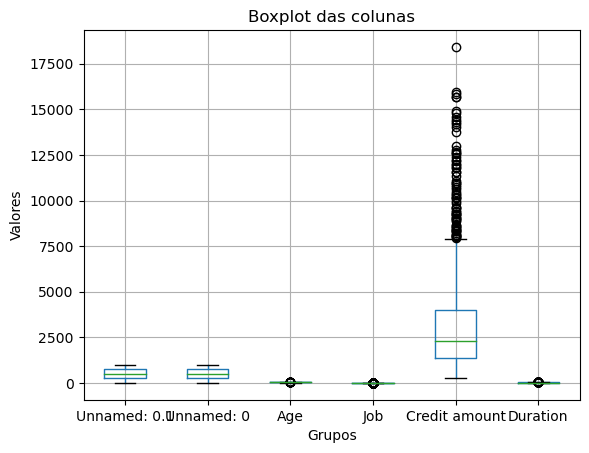

In [61]:
df_sem_duplicadas.boxplot()
plt.title('Boxplot das colunas')
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.show()

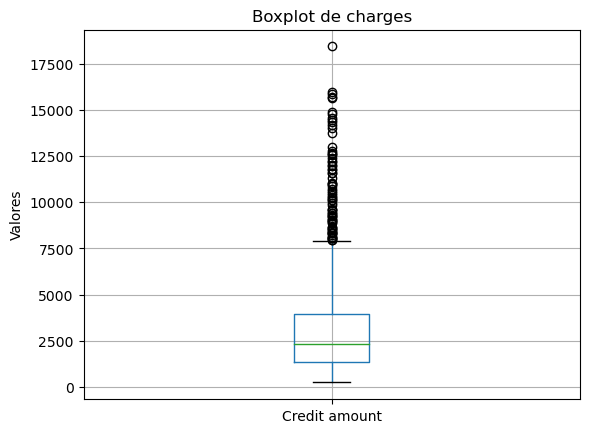

In [62]:
df_sem_duplicadas.boxplot(column='Credit amount')
plt.title('Boxplot de charges')
plt.ylabel('Valores')
plt.show()

In [63]:
def identificar_outliers(df, coluna):
    # Calculando o primeiro e terceiro quartis
    Q1 = df[coluna].quantile(0.25) #Primeiro Quartil
    Q3 = df[coluna].quantile(0.75) #Terceiro Quartil
    
    # Calculando o IQR (Intervalo Interquartil)
    IQR = Q3 - Q1
    
    # Calculando os limites superior e inferior para identificar os outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificando outliers na coluna especificada
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    
    return outliers

In [64]:
outliers_encontrados = identificar_outliers(df_sem_duplicadas,'Credit amount')

In [65]:
outliers_encontrados

,Unnamed: 0.1,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
3,902,902,42,male,2,free,Unidentified,Unidentified,10477,36,car,good
6,832,832,29,male,2,rent,little,little,11816,45,business,bad
9,672,672,42,male,3,own,little,Unidentified,10366,60,car,good
37,291,291,28,male,3,rent,little,moderate,9398,36,car,bad
42,450,450,30,male,3,own,Unidentified,Unidentified,11054,36,car,good
...,...,...,...,...,...,...,...,...,...,...,...,...
914,657,657,37,male,2,own,Unidentified,Unidentified,10222,48,radio/TV,good
936,395,395,32,male,2,rent,moderate,moderate,11760,39,education,good
940,818,818,43,male,3,own,little,little,15857,36,vacation/others,good
967,653,653,42,male,3,own,moderate,moderate,8086,36,car,bad
